# Sage 9.1 on CoCalc

https://wiki.sagemath.org/ReleaseTours/sage-9.1

In [1]:
version()

'SageMath version 9.1, Release Date: 2020-05-20'

In [2]:
x = var('x')
eq = 6*x^6 - 7*x^5 - 7*x^4 + 7*x^2 + 7*x - 6
sol = solve(eq, x)
sol

[x == (2/3), x == -1, x == (3/2), x == -1/2*I*sqrt(3) - 1/2, x == 1/2*I*sqrt(3) - 1/2, x == 1]

In [3]:
show(sol)

[x == (2/3), x == -1, x == (3/2), x == -1/2*I*sqrt(3) - 1/2, x == 1/2*I*sqrt(3) - 1/2, x == 1]

In [0]:
plot(eq, (x, -1.1, 1.6))

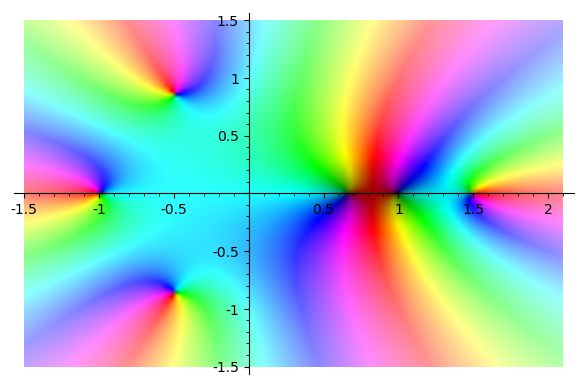

In [12]:
eq = 6*x^6 - 7*x^5 - 7*x^4 + 7*x^2 + 7*x - 6
complex_plot(eq, (-1.5, 2.1), (-1.5, 1.5))

## Polyhedral geometry

There is now a catalog for common polyhedral cones, e.g.



In [13]:
cones.nonnegative_orthant(5)

5-d cone in 5-d lattice N


New features for polyhedra:


In [8]:
sage: P = polytopes.cube(intervals='zero_one') # obtain others than the standard cube
sage: P = matrix([[0,1,0],[0,1,1],[1,0,0]])*P  # linear transformations
sage: it = P.face_generator()                  # a (fast and efficient) face generator
sage: next(it)

A 3-dimensional face of a Polyhedron in ZZ^3 defined as the convex hull of 8 vertices

In [0]:
sage: next(it)


In [0]:
sage: f = next(it)
sage: f.normal_cone()                          # normal cone for faces

In [0]:
sage: P.an_affine_basis()


In [7]:
sage: P = polytopes.hypercube(4)
sage: P.flag_f_vector(0,3)                     # flag_f_vector is exposed

64

In [8]:
P.plot()

Graphics3d Object

## Integral curves over finite fields

In [9]:
A.<x,y> = AffineSpace(GF(16),2)
C = Curve(y^3 + x^3*y + x); C  # Klein quartic

Affine Plane Curve over Finite Field in z4 of size 2^4 defined by x^3*y + y^3 + x

In [10]:
C.function_field()

Function field in y defined by y^3 + x^3*y + x

In [11]:
C.genus()

3

In [12]:
C.closed_points()

[Point (x, y),
 Point (x + (z4), y + (z4^3 + z4^2)),
 Point (x + (z4^2), y + (z4^3 + z4^2 + z4 + 1)),
 Point (x + (z4^3), y + (z4^2 + z4)),
 Point (x + (z4 + 1), y + (z4^3 + z4)),
 Point (x + (z4^2 + z4), y + (z4^2 + z4 + 1)),
 Point (x + (z4^2 + z4), y + (z4^3 + 1)),
 Point (x + (z4^2 + z4), y + (z4^3 + z4^2 + z4)),
 Point (x + (z4^3 + z4^2), y + (z4^2 + z4 + 1)),
 Point (x + (z4^2 + 1), y + (z4^3)),
 Point (x + (z4^3 + z4), y + (z4^2 + z4 + 1)),
 Point (x + (z4^2 + z4 + 1), y + (z4^2 + z4)),
 Point (x + (z4^2 + z4 + 1), y + (z4^3 + z4 + 1)),
 Point (x + (z4^2 + z4 + 1), y + (z4^3 + z4^2 + 1)),
 Point (x + (z4^3 + z4^2 + z4 + 1), y + (z4^2 + z4))]

In [13]:
p1, p2 = _[:2]
P1 = p1.place()
P2 = p2.place()
D = 5 * P1 - P2
D.basis_function_space()

[(x + z4)/x, 1/x^2*y + (z4^2 + z4)/x]

In [14]:
f1, f2 = D.basis_function_space()
f1.zeros()

[Place (x + z4, y^2 + (z4^3 + z4^2)*y + z4^2 + z4 + 1),
 Place (x + z4, y + z4^3 + z4^2)]

## Generator for cube-connected cycles

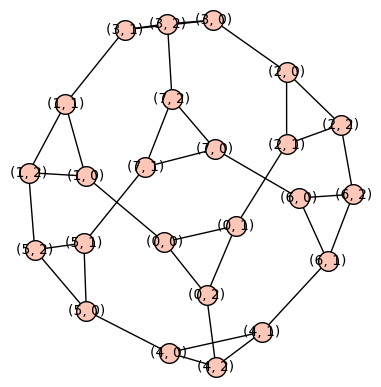

In [15]:
graphs.CubeConnectedCycle(3).plot()

## Manifolds

More functionalities in index notation for tensors

In [16]:
E.<x,y> = EuclideanSpace()
v = E.vector_field(-y, x)
t = E.tensor_field(0, 2, [[1, x], [-2*y, x^2]])
v['j']*(t['_ij'] + t['_ji']) == v.contract(2*t.symmetrize())

True

In [17]:
v

Vector field on the Euclidean plane E^2

In [18]:
t

Tensor field of type (0,2) on the Euclidean plane E^2

In [19]:
v['j'], t['_ij'],  t['_ji']

(X^j, X_ij, X_ji)

In [20]:
t.symmetrize()

Field of symmetric bilinear forms on the Euclidean plane E^2

In [21]:
@interact
def func(k = slider(0, 10, .1), j = (-10, 10), l = range_slider(-5, 5)):
    print("k: %s" % k)
    print("j: %s" % j)
    print("l: [%s, %s]" % l)

Interactive function <function func at 0x7f09a0460d90> with 3 widgets
  k: TransformFloatSlider(value=0.0, des…

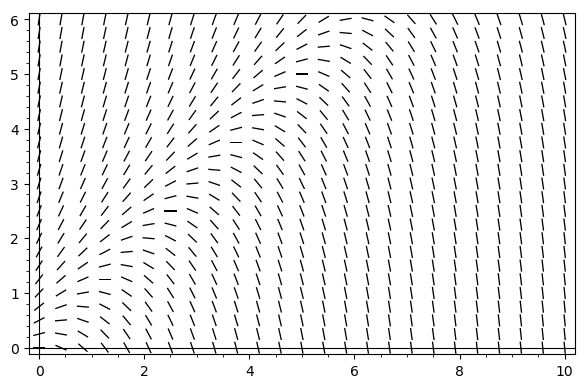

In [22]:
var('t y')
plot_slope_field(y - t, (t,0,10), (y,0,6), plot_points=25)

## Cellular Automata

https://doc.sagemath.org/html/en/reference/dynamics/cellular_automata.html

In [23]:
G = cellular_automata.GraftalLace([2,0,3,3,6,0,2,7])
G

Graftal Lace Cellular Automata with rule 20336027

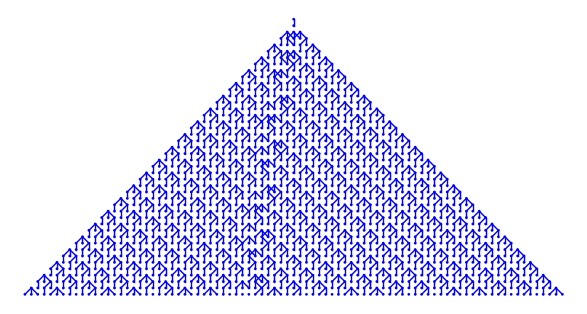

In [24]:
G.evolve(42)
G.plot()

In [25]:
init = 200*[1]
init[100] = 0
init[101] = 0
ECA = cellular_automata.Elementary(151, width=200, initial_state=init)
ECA

Elementary cellular automata with rule 151 and initial state [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

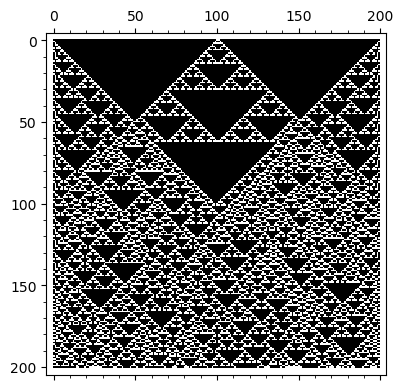

In [26]:
ECA.evolve(200)
ECA.plot()